In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import string
from wordcloud import WordCloud

In [2]:
# Cargamos el df
BW_df = pd.read_csv('./ZocaloCentralHotel_Trip.csv', encoding = "utf8")
BW_df

,calificacion,fecha,nombre,opinion
0,ui_bubble_rating bubble_50,marzo de 2020,Carlos,Excelente ubicación. Personal muy servicial y ...
1,ui_bubble_rating bubble_50,marzo de 2020,Antonio H,"Estuvimos muy contentos, el hotel se ve como n..."
2,ui_bubble_rating bubble_50,febrero de 2020,NicolaMarzotto,Meseros muy gentiles y amables. Perfecto equi...
3,ui_bubble_rating bubble_50,febrero de 2020,Paula U,"Nos quedamos en este hotel la semana pasada, d..."
4,ui_bubble_rating bubble_50,abril de 2019,Liebre 3015,Siempre que voy a CDMX solo en este hotel me h...
...,...,...,...,...
1202,ui_bubble_rating bubble_50,abril de 2017,Victor G,Excelente servicio. El personal de recepción e...
1203,ui_bubble_rating bubble_50,marzo de 2017,seichorn,Aunque técnicamente era un hotel de cuatro est...
1204,ui_bubble_rating bubble_50,diciembre de 2016,KerchieArndTheWorld,Nos alojamos en el Zócalo antes de ir a una bo...
1205,ui_bubble_rating bubble_40,marzo de 2017,Renzi36,Mi marido y yo pasamos 3 noches en este precio...


In [3]:
# Vemos la información del dataset
BW_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1207 entries, 0 to 1206
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   calificacion  1207 non-null   object
 1   fecha         1193 non-null   object
 2   nombre        1206 non-null   object
 3   opinion       1207 non-null   object
dtypes: object(4)
memory usage: 37.8+ KB


In [4]:
# Buscamos los 3  datos faltantes
BW_df[BW_df["fecha"].isna()]

,calificacion,fecha,nombre,opinion
5,ui_bubble_rating bubble_40,NaN,Mato,El Holiday Inn ciudad de México justo en el ...
6,ui_bubble_rating bubble_40,NaN,DocDick_47,La ubicación de este Holiday Inn - Zócalo es i...
27,ui_bubble_rating bubble_50,NaN,rgon,Nos alojamos dos noches en este hotel. La ubic...
29,ui_bubble_rating bubble_40,NaN,yvr1,Me alojé recientemente en el Holiday Inn de ...
47,ui_bubble_rating bubble_20,NaN,worldtravs,Nos alojamos en el Holiday Inn en 2005 marzo...
49,ui_bubble_rating bubble_30,NaN,nsmHouston,Me alojé sólo una noche para estar cerca de la...
50,ui_bubble_rating bubble_40,NaN,GoPlaces35074,Éste es un gran hotel moderno asequible en el ...
51,ui_bubble_rating bubble_40,NaN,Inspire11182,El Holiday Inn de Zócalo es un excelente lugar...
1073,ui_bubble_rating bubble_50,NaN,Rhondawhurl,Estuvimos 5 noches en el Holiday Inn de Zócalo...
1075,ui_bubble_rating bubble_50,NaN,gggz99,Estuvimos 7 noches allí. Nuestra habitación er...


In [5]:
# Rellenamos con los datos más proximo superior (ffill), podríamos tambien hacerlo con el dato más próximo inferior (backfill)
BW_df.fillna(method = "ffill", inplace = True)

In [6]:
# Verificamos que ya no haya valores nulos
BW_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1207 entries, 0 to 1206
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   calificacion  1207 non-null   object
 1   fecha         1207 non-null   object
 2   nombre        1207 non-null   object
 3   opinion       1207 non-null   object
dtypes: object(4)
memory usage: 37.8+ KB


In [7]:
# Empezamos a tranformar los datos necesarios
BW_df.head(5)

,calificacion,fecha,nombre,opinion
0,ui_bubble_rating bubble_50,marzo de 2020,Carlos,Excelente ubicación. Personal muy servicial y ...
1,ui_bubble_rating bubble_50,marzo de 2020,Antonio H,"Estuvimos muy contentos, el hotel se ve como n..."
2,ui_bubble_rating bubble_50,febrero de 2020,NicolaMarzotto,Meseros muy gentiles y amables. Perfecto equi...
3,ui_bubble_rating bubble_50,febrero de 2020,Paula U,"Nos quedamos en este hotel la semana pasada, d..."
4,ui_bubble_rating bubble_50,abril de 2019,Liebre 3015,Siempre que voy a CDMX solo en este hotel me h...


In [8]:
# Tranformemos la calificación a un número únicamente qie es el penúltimo de la cadena
for i, cali in enumerate(BW_df['calificacion']):
    new_cal = cali[-2:-1]
    BW_df['calificacion'][i] = int(new_cal)

In [9]:
BW_df["calificacion"] = BW_df["calificacion"].astype(int)

In [10]:
meses = {"enero": 1, "febrero": 2, "marzo": 3, "abril": 4, "mayo": 5, "junio": 6, "julio": 7, "agosto": 8, "septiembre": 9, "octubre": 10, "noviembre": 11, "diciembre": 12}

In [11]:
# Transformamos la fecha a mes y año
mes = []
año = []
for i, fecha in enumerate(BW_df["fecha"]):
    m = fecha.split()[0]
    a = int(fecha.split()[-1])
    
    if m in meses.keys():
        m_numero = m.replace(m, str(meses.get(m)))
    mes.append(int(m_numero))
    año.append(a)

BW_df["mes"] = mes
BW_df["año"] = año

In [12]:
# Eliminamo la fecha ya que tenemos el mes y año en otars columnas
BW_df.drop('fecha', axis = 1, inplace = True)

In [13]:
# Volvemos a ver los datos para ver como quedarón
BW_df.head(8)

,calificacion,nombre,opinion,mes,año
0,5,Carlos,Excelente ubicación. Personal muy servicial y ...,3,2020
1,5,Antonio H,"Estuvimos muy contentos, el hotel se ve como n...",3,2020
2,5,NicolaMarzotto,Meseros muy gentiles y amables. Perfecto equi...,2,2020
3,5,Paula U,"Nos quedamos en este hotel la semana pasada, d...",2,2020
4,5,Liebre 3015,Siempre que voy a CDMX solo en este hotel me h...,4,2019
5,4,Mato,El Holiday Inn ciudad de México justo en el ...,4,2019
6,4,DocDick_47,La ubicación de este Holiday Inn - Zócalo es i...,4,2019
7,5,Elias Noriega,La vista al Zócalo es increíble y visitarlo en...,9,2019


In [14]:
# Concideraremos que las calificaciones mayores o iguales a 4 quiere decir que es un buen hotel (1) y menos a 4 malos (0)
retroalimentacion = []
for i in BW_df["calificacion"]:
    if i >= 4:
        retroalimentacion.append(1)
    else:
        retroalimentacion.append(0)
        
BW_df["retroalimentacion"] = retroalimentacion

In [15]:
# El nombre de los usuarios en ésta ocasión no nos será de mucha utilidad por lo que sería mejor eliminarla
BW_df.drop("nombre", axis = 1, inplace = True)

In [16]:
sns.set_style('whitegrid')

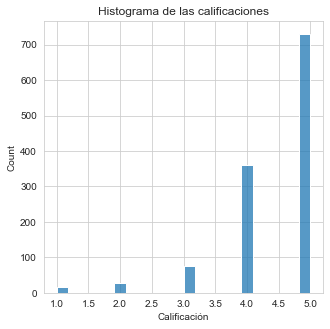

In [17]:
# Empezamos a hacer una representación gráfica de los datos que tenemos para intentar encontrar dtos interesantes
# Histograma de las calificaciones
plt.figure(figsize = (5,5))
sns.histplot(x = "calificacion", data = BW_df)
plt.title("Histograma de las calificaciones")
plt.xlabel("Calificación")
plt.show()

In [18]:
# Pocerntaje de calificación
TOTAL_OPINIONES = BW_df.shape[0]
for i in range(1,6):
    procentaje = BW_df[BW_df["calificacion"] == i].shape[0] / TOTAL_OPINIONES
    print("Porcentaje con calificación {} es {:.5f}%".format(i, procentaje*100))
    
print("Debe mejorar 0.018%")
print("Es bueno 98.113%")

Porcentaje con calificación 1 es 1.32560%
Porcentaje con calificación 2 es 2.23695%
Porcentaje con calificación 3 es 6.21375%
Porcentaje con calificación 4 es 29.74316%
Porcentaje con calificación 5 es 60.48053%
Debe mejorar 0.018%
Es bueno 98.113%


In [19]:
BW_df

,calificacion,opinion,mes,año,retroalimentacion
0,5,Excelente ubicación. Personal muy servicial y ...,3,2020,1
1,5,"Estuvimos muy contentos, el hotel se ve como n...",3,2020,1
2,5,Meseros muy gentiles y amables. Perfecto equi...,2,2020,1
3,5,"Nos quedamos en este hotel la semana pasada, d...",2,2020,1
4,5,Siempre que voy a CDMX solo en este hotel me h...,4,2019,1
...,...,...,...,...,...
1202,5,Excelente servicio. El personal de recepción e...,4,2017,1
1203,5,Aunque técnicamente era un hotel de cuatro est...,3,2017,1
1204,5,Nos alojamos en el Zócalo antes de ir a una bo...,12,2016,1
1205,4,Mi marido y yo pasamos 3 noches en este precio...,3,2017,1


In [20]:
# Eliminamos la calificación ya que tenemos ahora la retroalimentación para guiarnos
BW_df.drop("calificacion", axis = 1, inplace = True)

<AxesSubplot:>

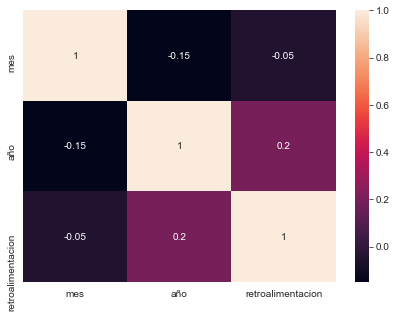

In [21]:
# Haremós un mpa de correlación para ver si hay alguna relación núemrica que aún no hayamos visto
corr = BW_df.corr()

plt.figure(figsize = (7,5))
sns.heatmap(corr, annot = True)

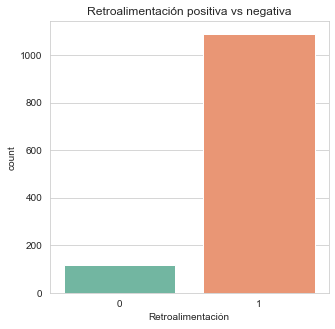

In [22]:
# Viendo de otra manera las críticas del hotel
plt.figure(figsize = (5,5))
sns.countplot(x = "retroalimentacion", data = BW_df, palette = "Set2")
plt.title("Retroalimentación positiva vs negativa")
plt.xlabel("Retroalimentación")
plt.show()

Text(0.5, 0, 'Año')

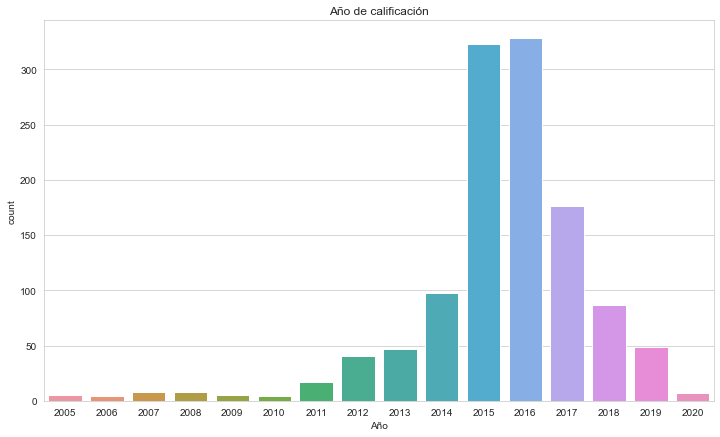

In [23]:
# ¿De que año son las criticas?
plt.figure(figsize = (12,7))
sns.countplot(x = "año", data =  BW_df)
plt.title("Año de calificación")
plt.xlabel("Año")

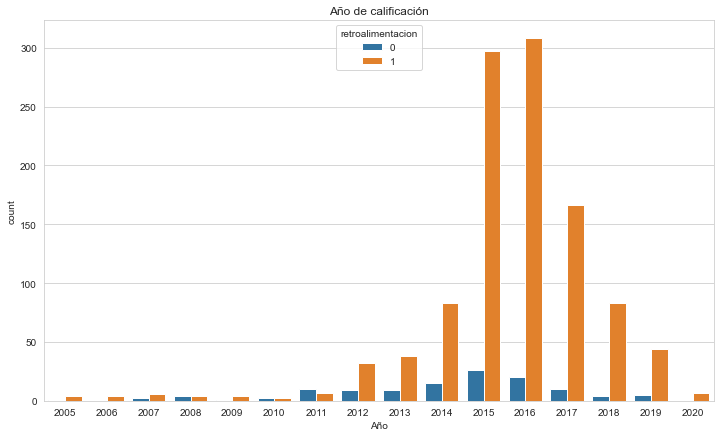

In [24]:
# ¿Hay una relevancia entre la retroalimentación y el año?
plt.figure(figsize = (12,7))
sns.countplot(x = "año", data =  BW_df, hue = "retroalimentacion")
plt.title("Año de calificación")
plt.xlabel("Año")
plt.show()

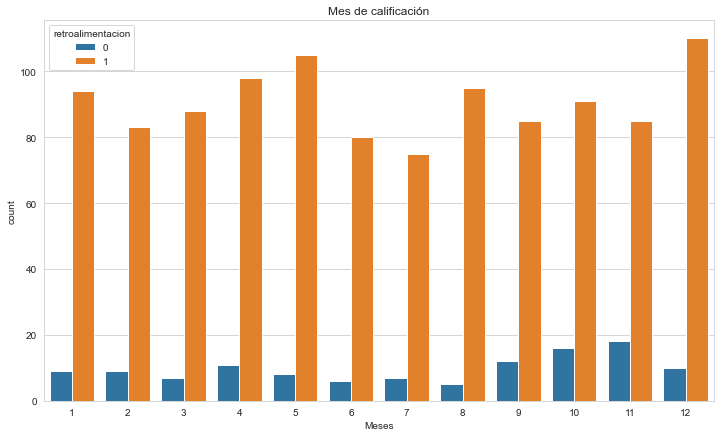

In [25]:
# ¿Hay una relación con los meses?
plt.figure(figsize = (12,7))
sns.countplot(x = "mes", data =  BW_df, hue = "retroalimentacion")
plt.title("Mes de calificación")
plt.xlabel("Meses")
plt.show()

Text(0.5, 1.0, 'Acumulación de las opiniones con respecto al año')

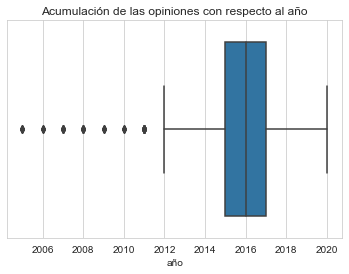

In [26]:
# Boxplot para ver en donde se acumulan las opiniones de los usuarios
sns.boxplot(x = "año", data = BW_df)
plt.title("Acumulación de las opiniones con respecto al año")

In [27]:
print("*****Porcentaje de opiniones por año*****")
TOTAL = BW_df.shape[0]
for i in range(6,10):
    año = (BW_df["año"] == (2000+i)).sum()
    print("\naño 200{} porcentaje de opiniones: {:.5F}% \nes un total de {}".format(i, (año/TOTAL)*100, año))
for i in range(10,22):
    año = (BW_df["año"] == (2000+i)).sum()
    print("\naño 20{} porcentaje de opiniones: {:.5F}% \nes un total de {}".format(i, (año/TOTAL)*100, año))   

*****Porcentaje de opiniones por año*****

año 2006 porcentaje de opiniones: 0.33140% 
es un total de 4

año 2007 porcentaje de opiniones: 0.66280% 
es un total de 8

año 2008 porcentaje de opiniones: 0.66280% 
es un total de 8

año 2009 porcentaje de opiniones: 0.41425% 
es un total de 5

año 2010 porcentaje de opiniones: 0.33140% 
es un total de 4

año 2011 porcentaje de opiniones: 1.40845% 
es un total de 17

año 2012 porcentaje de opiniones: 3.39685% 
es un total de 41

año 2013 porcentaje de opiniones: 3.89395% 
es un total de 47

año 2014 porcentaje de opiniones: 8.11930% 
es un total de 98

año 2015 porcentaje de opiniones: 26.76056% 
es un total de 323

año 2016 porcentaje de opiniones: 27.17481% 
es un total de 328

año 2017 porcentaje de opiniones: 14.58161% 
es un total de 176

año 2018 porcentaje de opiniones: 7.20795% 
es un total de 87

año 2019 porcentaje de opiniones: 4.05965% 
es un total de 49

año 2020 porcentaje de opiniones: 0.57995% 
es un total de 7

año 2021 por

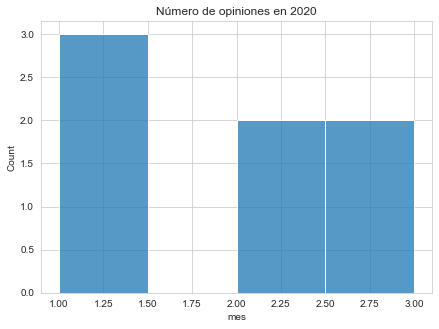

In [28]:
# Año critico 2020 pandemia
plt.figure(figsize = (7,5))
sns.histplot(x = "mes", data = BW_df[BW_df["año"] == 2020])
plt.title("Número de opiniones en 2020")
plt.show()

In [29]:
# Procesamiento de los datos
# Las opiniones: Serán removidas las stopwords, los signos y lo números
# STOPWORDS
nltk.download('stopwords')
STOPWORDS_SPANISH = nltk.corpus.stopwords.words('spanish')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP-001\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
# Agregamos una palabra que seguro se repetirá mucho y no es necesaria "Hotel" y "Hoteles"
STOPWORDS_SPANISH.append("hotel")
STOPWORDS_SPANISH.append("hoteles")

In [31]:
# CARACTERES ESPECIALES
signos = list(string.punctuation)

In [32]:
# NUMEROS
numeros = list(["0","1","2","3","4","5","6","7","8","9"])

In [33]:
opiniones = []
for phrase in BW_df["opinion"]:
    opinion = [word for word in phrase.split() if word.lower() not in STOPWORDS_SPANISH]
    opiniones.append(" ".join(opinion))

In [34]:
new_opiniones = []
for opinion in opiniones:
    sin_signos = [char for char in opinion if char not in signos]
    new_opiniones.append("".join(sin_signos))

In [35]:
clean_opinions = []
for opinion in new_opiniones:
    sin_num = [char for char in opinion if char not in numeros]
    clean_opinions.append("".join(sin_num))

In [36]:
# Sustituirimos la variable opinion con las nuevas
BW_df["opinion"] = clean_opinions

In [37]:
BW_df

,opinion,mes,año,retroalimentacion
0,Excelente ubicación Personal servicial atento ...,3,2020,1
1,contentos ve nuevo amables recepcion restauran...,3,2020,1
2,Meseros gentiles amables Perfecto equilibrio c...,2,2020,1
3,quedamos semana pasada desgraciadamente sólo d...,2,2020,1
4,Siempre voy CDMX solo hospedo excelente habita...,4,2019,1
...,...,...,...,...
1202,Excelente servicio personal recepción amable S...,4,2017,1
1203,Aunque técnicamente cuatro estrellas ambiente ...,3,2017,1
1204,alojamos Zócalo ir boda Morelia habitación exa...,12,2016,1
1205,marido pasamos noches precioso hotel habitaci...,3,2017,1


In [38]:
# Sepraemos las opiniones buenas de las malas
buenas = ""
malas = ""
for i, cal in enumerate(BW_df["retroalimentacion"]):
    if cal == 1:
        buenas += BW_df["opinion"][i]
    else:
        malas += BW_df["opinion"][i]

In [39]:
wordcloud1 = WordCloud().generate(buenas)
wordcloud2 = WordCloud().generate(malas)

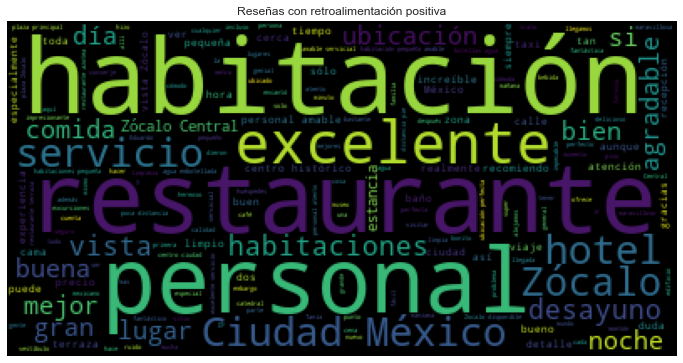

In [40]:
# Las palabras más usadas en la retroalimentación positiva
plt.figure(figsize = (12,12))
plt.imshow(wordcloud1)
plt.title("Reseñas con retroalimentación positiva")
plt.grid(False)
plt.axis(False)
plt.show()

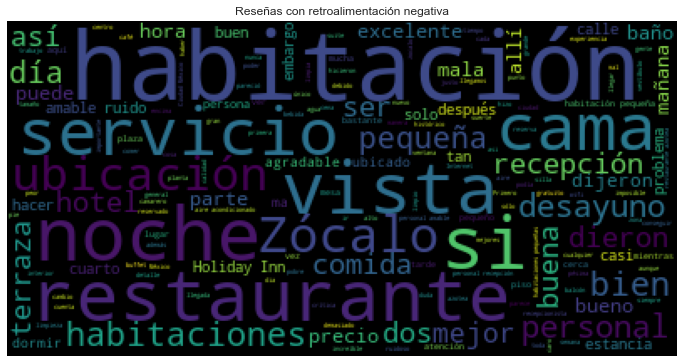

In [41]:
# Las palabras más usadas en la retroalimentación negativa
plt.figure(figsize = (12,12))
plt.imshow(wordcloud2)
plt.title("Reseñas con retroalimentación negativa")
plt.grid(False)
plt.axis(False)
plt.show()

In [42]:
# Guardamos la información pre procesada
BW_df.to_csv("ZocaloCentralHotel_preprocesado.csv")

In [43]:
# Vemos el dataset original para ver las opiniones competas
original_df = pd.read_csv("./ZocaloCentralHotel_Trip.csv", encoding = "utf8")

In [44]:
# Viendo opiniones con retroalimentación positiva con la palabra habitación
opiniones_buenas = []
# Viendo opiniones con retroalimentación negativa con la palabra habitación
opiniones_malas = []

# Buscamos todas las opiniones con la palabra habitación
opiniones = original_df.loc[original_df["opinion"].str.contains("si ")]

In [45]:
# Tranformemos la calificación a un número únicamente qie es el penúltimo de la cadena
for i, cali in enumerate(original_df['calificacion']):
    new_cal = cali[-2:-1]
    original_df['calificacion'][i] = int(new_cal)
    
original_df["calificacion"] = original_df["calificacion"].astype(int)

In [46]:
original_df[original_df["calificacion"] >= 4]["opinion"]

0       Excelente ubicación. Personal muy servicial y ...
1       Estuvimos muy contentos, el hotel se ve como n...
2       Meseros muy gentiles y amables. Perfecto  equi...
3       Nos quedamos en este hotel la semana pasada, d...
4       Siempre que voy a CDMX solo en este hotel me h...
                              ...                        
1202    Excelente servicio. El personal de recepción e...
1203    Aunque técnicamente era un hotel de cuatro est...
1204    Nos alojamos en el Zócalo antes de ir a una bo...
1205    Mi marido y yo pasamos 3 noches en este precio...
1206    Justo en frente del Zócalo, este lugar tiene u...
Name: opinion, Length: 1089, dtype: object

In [47]:
original_df[original_df["calificacion"] < 4]["opinion"]

16      Tuve una pésima atencion por parte del persona...
18      El fin de semana tenían buffet. la comida muy ...
24      En el checkout cobran más de lo inicial.ademas...
32      El Holiday Inn de Zócalo está situado en el ce...
37        Un lugar excelente para alojarse si estás un...
                              ...                        
1109    Estoy fuera de práctica escrito una mala críti...
1144    No consigues las mejores habitaciones parece d...
1147    Muy contento con el servicio del personal de r...
1160    Las habitaciones son antiguas y sencillas. Ven...
1198    Nos alojamos 3 noches aquí como parte de un to...
Name: opinion, Length: 118, dtype: object

In [48]:
# Opiniones buenas
print(original_df["opinion"][0], end = "\n\n")
print(original_df["opinion"][1], end = "\n\n")
print(original_df["opinion"][2], end = "\n\n")

Excelente ubicación. Personal muy servicial y atento. Nos encantó. Planeamos regresar. Su restaurante de comida contemporánea mexicana es excelente y hornean un pan delicioso, que también pueden comprar para llevar. Dan recorridos por la ciudad para aquellas personas que no la conocen. Es una buena opción sin costo extra. Cuentan con servicio de planificación de actividades.

Estuvimos muy contentos, el hotel se ve como nuevo, fueron muy amables en la recepcion, el restaurante esta increíble y la comida deliciosa, en el buffett gratis del desayuno Brandon y Daniel fueron particularmente amables, con pandulce y tortillas recien hechas de cortesía. Excelente hotel muy ubicado, directo en el Zócalo (con estacionamiento propio sin costo).

Meseros muy gentiles y amables. Perfecto  equilibrio claridad/precio. Comida sabrosa y vista preciosa del zócalo. Una experiencia que todos tienen que hacer si visitan la ciudad de México. Muy recomendable. 



In [52]:
# Opiniones malas
print(original_df["opinion"][1109], end = "\n\n")
print(original_df["opinion"][1144], end = "\n\n")
print(original_df["opinion"][1198], end = "\n\n")

Estoy fuera de práctica escrito una mala crítica porque la mayor parte, tengo muy buenas experiencias con los hoteles en los que nos hemos alojado. He estado en la Ciudad de México varias veces y me he alojado en lugares maravillosos. Zócalo Central es la excepción. Primero, había reservado una suite junior con vistas de Zócalo - pagando mucho más por supuesto. Cuando llegamos a las 2:15 de la habitación no estaba lista. Suficiente. El registro es a las 3:00. Nos dijeron que sería en el tercer piso. Genial. Fuimos a café volvimos y a las 3:00 todavía no habitación. Estaba esperando a ser facturado. A las 3:45 de la habitación aún estaba "esperando a ser registrado" y nos dijeron que volver en una media hora. En este punto, hablé con el director y me dijeron que no era algo malo,…

No consigues las mejores habitaciones parece de leer otras críticas. Estuvimos aquí cuatro días y nos alojamos en dos habitaciones, la primera siendo tan pequeño uno de nosotros tuvimos que mover casi mientra